In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ferra\OneDrive\Documentos\Ubiqum\The Credit One Project\credit_one.csv")
df = df.drop('ID', axis=1) # Treiem columna ID
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True) # Substituïr PAY_0 per PAY_1 per mantenir una cronología
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [4]:
# No cal fer res amb nuls o NaN

In [5]:
matriu_correlacio = df.corr()
#df.corr()
# matriu_correlacio

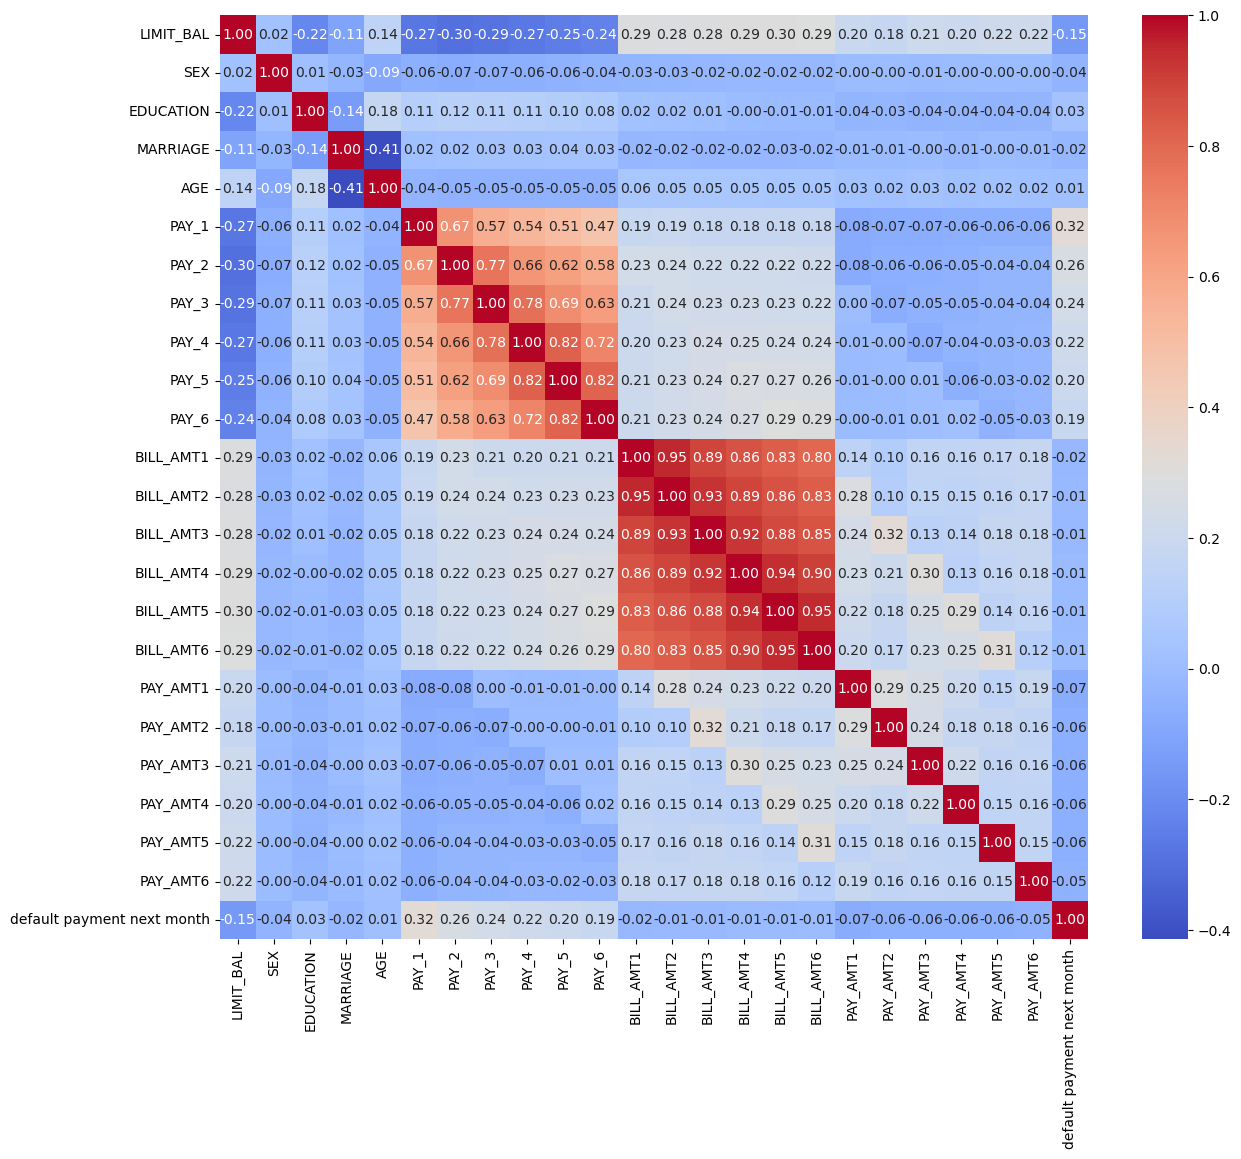

In [6]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

annot=True

Indica que vols mostrar els valors dins de cada cel·la del heatmap.

Si ho poses False, només veuràs els colors, sense números.

fmt=".2f"

Defineix el format dels números que es mostren a cada cel·la.

.2f vol dir que es mostraran amb 2 decimals.

cmap="coolwarm"

És la paleta de colors que utilitza el heatmap.

"coolwarm" va del blau (valors baixos, -1) al vermell (valors alts, 1).

Pots canviar-ho per altres paletes: "viridis", "plasma", "RdYlGn", etc.

In [8]:
# FEATURING PAY_* # CREEM PAY_AGRUPAT FENT LA MITJA # axis=1 FILES # axis=0 COLUMNES

In [9]:
# Creo la variable cols i li associo els noms de les etiquetes de les columnes de PAY_*

In [10]:
cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df['PAY_AGRUPAT'] = df[cols].mean(axis=1)
df.drop(cols, axis=1, inplace=True) # per eliminar els PAY_* del df
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PAY_AGRUPAT
0,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-0.333333
1,120000,2,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.500000
2,90000,2,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.000000
3,50000,2,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.000000
4,50000,1,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-0.333333


In [11]:
# idem BILL_AMT*

In [12]:
cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df['BILL_AMT_AGRUPAT'] = df[cols].mean(axis=1)
df.drop(cols, axis=1, inplace=True)
# df['BILL_AMT_AGRUPAT']
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PAY_AGRUPAT,BILL_AMT_AGRUPAT
0,20000,2,2,1,24,0,689,0,0,0,0,1,-0.333333,1284.000000
1,120000,2,2,2,26,0,1000,1000,1000,0,2000,1,0.500000,2846.166667
2,90000,2,2,2,34,1518,1500,1000,1000,1000,5000,0,0.000000,16942.166667
3,50000,2,2,1,37,2000,2019,1200,1100,1069,1000,0,0.000000,38555.666667
4,50000,1,2,1,57,2000,36681,10000,9000,689,679,0,-0.333333,18223.166667


In [13]:
# idem PAY_AMT*

In [14]:
cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df['PAY_AMT_AGRUPAT'] = df[cols].mean(axis=1)
df.drop(cols, axis=1, inplace=True)
# df['PAY_AMT_AGRUPAT']
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month,PAY_AGRUPAT,BILL_AMT_AGRUPAT,PAY_AMT_AGRUPAT
0,20000,2,2,1,24,1,-0.333333,1284.000000,114.833333
1,120000,2,2,2,26,1,0.500000,2846.166667,833.333333
2,90000,2,2,2,34,0,0.000000,16942.166667,1836.333333
3,50000,2,2,1,37,0,0.000000,38555.666667,1398.000000
4,50000,1,2,1,57,0,-0.333333,18223.166667,9841.500000


# AGE

In [16]:
# Tot i que el meu Baseline es un logistic Regressor, a part de les variables categòriques, tractaré AGE (numèrica) per si vull utilitzar un LINEAR REGRESSOR

AGE # DISCRETITZAR - BINNING # PER A MODEL DE REGRESSIÓ - (RF O XGBOOST NO !! HO TENEN IMPLÍCIT I ELS POT LIAR)
AL FER  BINS, LA VARIABLE, QUE ES NUMÈRICA (24, 26, 34, ...), PASSA A CATEGÒRICA (jove, adult, gran)
Ara, DUMIFICAR donat que cal codificar com a numèrica pq l'entengui el model. (0 -1 -0)

In [18]:
# OHE amb .get_dummies # MANUAL VERSION
#bins = [0, 17, 64, 120]  # límits
#labels = ['jove', 'adult', 'gran']
#df['AGE'] = pd.cut(df['AGE'], bins=bins, labels=labels)
#df_encoded = pd.get_dummies(df, columns=['AGE'])
#df_encoded

In [19]:
#df_encoded['AGE'].value_counts()

In [20]:
#df.head()

Exemple: discretitzar AGE AMB OHE sense .get_dummies //
Aquest codi està en Markdown pq no s'executi //
bins = [0, 17, 64, 120]  # límits
labels = ['jove', 'adult', 'gran']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels)
1. Inicialitzar encoder (versió nova sklearn)
encoder = OneHotEncoder(sparse_output=False, drop=None) # False (array complet) per obtenir una matriu densa i True per dispersa (no tots els valors, per estalviar memoria)
encoder = OneHotEncoder(categories=[['jove', 'adult', 'gran']], sparse_output=False, drop=None) # per definir manualment les categories
2. Ajustar i transformar la columna AGE_GROUP
encoded = encoder.fit_transform(df[['AGE_GROUP']])
3. Convertim a DataFrame
encoded_df = pd.DataFrame(encoded, 
                          columns=encoder.get_feature_names_out(['AGE_GROUP']), 
                          index=df.index)
4. Concatenar amb df original i eliminar AGE_GROUP si vols
df_encoded = pd.concat([df.drop(columns=['AGE_GROUP']), encoded_df], axis=1)
5. Mostrar resultat
df_encoded.head()

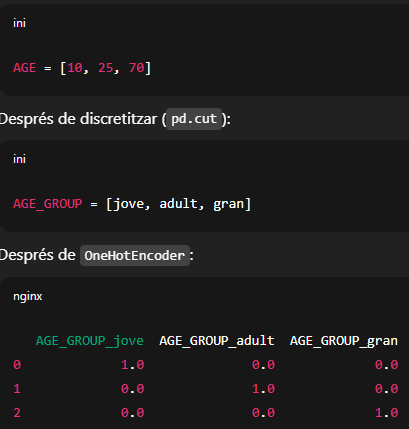

In [23]:
# OHE per a SEX

Un punt molt important en el teu cas és que, com que els valors són números (1 i 2), primer hem d'indicar a pandas que els tracti com a categories diferents ('Male', 'Female') i no com una magnitud numèrica. Si no ho fem, l'OneHotEncoder no funcionarà com esperes.

La manera més clara de fer-ho és mapejar aquests números a etiquetes de text.

In [25]:
# Manopla's methoz
# df['SEX'] = df['SEX'].map({1: 'male', 2: 'female'}) # El .map() fa una transformació element a element sobre la sèrie (columna SEX).
# df_encoded = pd.get_dummies(df, columns=['SEX']) # Substituïm valors de SEX per 0 i 1 mètode manual
# df_encoded

In [26]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [27]:
mapeig_sexe = {1: 'male', 2: 'female'}
df['SEX'] = df['SEX'].map(mapeig_sexe)
columna_a_codificar = df[['SEX']]
df_restant = df.drop(columns=['SEX'])
encoder = OneHotEncoder(sparse_output=False, drop=None)
dades_codificades = encoder.fit_transform(columna_a_codificar)
df_codificat = pd.DataFrame(dades_codificades, columns=encoder.get_feature_names_out(['SEX']))
df_final = pd.concat([df_restant, df_codificat], axis=1)
# df_final.head()
df = df_final
df.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,default payment next month,PAY_AGRUPAT,BILL_AMT_AGRUPAT,PAY_AMT_AGRUPAT,SEX_female,SEX_male
0,20000,2,1,24,1,-0.333333,1284.000000,114.833333,1.0,0.0
1,120000,2,2,26,1,0.500000,2846.166667,833.333333,1.0,0.0
2,90000,2,2,34,0,0.000000,16942.166667,1836.333333,1.0,0.0
3,50000,2,1,37,0,0.000000,38555.666667,1398.000000,1.0,0.0
4,50000,2,1,57,0,-0.333333,18223.166667,9841.500000,0.0,1.0


In [28]:
# OHE # EDUCATION

In [29]:
# df['EDUCATION'] = df['EDUCATION'].map({1: 'postgrau', 2: 'universitari', 3: 'secundaria', 4: 'altres'})
# df_encoded = pd.get_dummies(df, columns=['EDUCATION'])
# df_encoded

In [30]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [31]:
map = {1: 'postgrau',2: 'universitari',3: 'secundaria',4: 'altres'}
df['EDUCATION'] = df['EDUCATION'].map(map)
df['EDUCATION'] = df['EDUCATION'].fillna('altres') # Gestió de valors no mapejats (ex: 0, 5, 6): els assignem a 'altres'
columna_a_codificar = df[['EDUCATION']]
df_restant = df.drop(columns=['EDUCATION'])
encoder = OneHotEncoder(sparse_output=False, drop='first')
dades_codificades = encoder.fit_transform(columna_a_codificar)
df_codificat = pd.DataFrame(dades_codificades, columns=encoder.get_feature_names_out(['EDUCATION']))
# Unim les dades restants amb les noves columnes codificades
df_final = pd.concat([df_restant, df_codificat], axis=1)
# Creem un DataFrame amb totes les columnes menys 'EDUCATION'
df_restant = df.drop(columns=['EDUCATION'])
# Unim els dos DataFrames, un al costat de l'altre
df_final = pd.concat([df_restant, df_codificat], axis=1)
# 3. MOSTRAR RESULTAT
print("DataFrame Final amb la columna 'EDUCATION' codificada:")
df = df_final
df.head()

DataFrame Final amb la columna 'EDUCATION' codificada:


,LIMIT_BAL,MARRIAGE,AGE,default payment next month,PAY_AGRUPAT,BILL_AMT_AGRUPAT,PAY_AMT_AGRUPAT,SEX_female,SEX_male,EDUCATION_postgrau,EDUCATION_secundaria,EDUCATION_universitari
0,20000,1,24,1,-0.333333,1284.000000,114.833333,1.0,0.0,0.0,0.0,1.0
1,120000,2,26,1,0.500000,2846.166667,833.333333,1.0,0.0,0.0,0.0,1.0
2,90000,2,34,0,0.000000,16942.166667,1836.333333,1.0,0.0,0.0,0.0,1.0
3,50000,1,37,0,0.000000,38555.666667,1398.000000,1.0,0.0,0.0,0.0,1.0
4,50000,1,57,0,-0.333333,18223.166667,9841.500000,0.0,1.0,0.0,0.0,1.0


In [32]:
# OHE MARRIAGE

In [33]:
# df['MARRIAGE'] = df['MARRIAGE'].map({1: 'casat', 2: 'solter', 3: 'altres', 4: 'desconegut'})
# df_encoded = pd.get_dummies(df, columns=['MARRIAGE'])
# df_encoded

In [34]:
# df_encoded.columns
#df_encoded.columns.tolist()

In [35]:
# df_encoded.T

In [36]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [37]:
df['MARRIAGE'] = df['MARRIAGE'].map({1: 'casat', 2: 'solter', 3: 'altres', 0: 'desconegut'})
encoder = OneHotEncoder(sparse_output=False)
dades_codificades = encoder.fit_transform(df[['MARRIAGE']])
df_codificat = pd.DataFrame(dades_codificades, columns=encoder.get_feature_names_out(['MARRIAGE']), index=df.index)
df_final = pd.concat([df.drop(columns=['MARRIAGE']), df_codificat], axis=1)
df = df_final
df.head()

,LIMIT_BAL,AGE,default payment next month,PAY_AGRUPAT,BILL_AMT_AGRUPAT,PAY_AMT_AGRUPAT,SEX_female,SEX_male,EDUCATION_postgrau,EDUCATION_secundaria,EDUCATION_universitari,MARRIAGE_altres,MARRIAGE_casat,MARRIAGE_desconegut,MARRIAGE_solter
0,20000,24,1,-0.333333,1284.000000,114.833333,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,120000,26,1,0.500000,2846.166667,833.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,90000,34,0,0.000000,16942.166667,1836.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,50000,37,0,0.000000,38555.666667,1398.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,50000,57,0,-0.333333,18223.166667,9841.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


df['MARRIAGE'] = df['MARRIAGE'].map({1: 'casat', 2: 'solter', 3: 'altres', 0: 'desconegut'})
columna_a_codificar = df[['MARRIAGE']]
df_restant = df.drop(columns=['MARRIAGE'])
encoder = OneHotEncoder(sparse_output=False, drop=None)
dades_codificades = encoder.fit_transform(columna_a_codificar)
df_codificat = pd.DataFrame(dades_codificades, columns=encoder.get_feature_names_out(['MARRIAGE']))
df_final = pd.concat([df_restant, df_codificat], axis=1)
df_restant = df.drop(columns=['MARRIAGE'])
df_final = pd.concat([df_restant, df_codificat], axis=1)
df_final = df
df.head()

In [39]:
df.columns

Index(['LIMIT_BAL', 'AGE', 'default payment next month', 'PAY_AGRUPAT',
       'BILL_AMT_AGRUPAT', 'PAY_AMT_AGRUPAT', 'SEX_female', 'SEX_male',
       'EDUCATION_postgrau', 'EDUCATION_secundaria', 'EDUCATION_universitari',
       'MARRIAGE_altres', 'MARRIAGE_casat', 'MARRIAGE_desconegut',
       'MARRIAGE_solter'],
      dtype='object')

In [40]:
df.rename(columns={'default payment next month': 'default'}, inplace=True)
df.columns

Index(['LIMIT_BAL', 'AGE', 'default', 'PAY_AGRUPAT', 'BILL_AMT_AGRUPAT',
       'PAY_AMT_AGRUPAT', 'SEX_female', 'SEX_male', 'EDUCATION_postgrau',
       'EDUCATION_secundaria', 'EDUCATION_universitari', 'MARRIAGE_altres',
       'MARRIAGE_casat', 'MARRIAGE_desconegut', 'MARRIAGE_solter'],
      dtype='object')

In [41]:
# Definir X
# Definir y

In [42]:
y = df['default']

In [43]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64

In [44]:
X = df.drop(columns=['default'])

In [45]:
X

,LIMIT_BAL,AGE,PAY_AGRUPAT,BILL_AMT_AGRUPAT,PAY_AMT_AGRUPAT,SEX_female,SEX_male,EDUCATION_postgrau,EDUCATION_secundaria,EDUCATION_universitari,MARRIAGE_altres,MARRIAGE_casat,MARRIAGE_desconegut,MARRIAGE_solter
0,20000,24,-0.333333,1284.000000,114.833333,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,120000,26,0.500000,2846.166667,833.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,90000,34,0.000000,16942.166667,1836.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,50000,37,0.000000,38555.666667,1398.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,50000,57,-0.333333,18223.166667,9841.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0.000000,120891.500000,7091.666667,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
29996,150000,43,-0.666667,3530.333333,2415.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
29997,30000,37,1.333333,11749.333333,5216.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
29998,80000,41,-0.166667,44435.166667,24530.166667,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [46]:
# Model
from sklearn.linear_model import LogisticRegression

In [47]:
# Definir model & fit etc..

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
algo = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', class_weight='balanced')
model = algo.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.64      0.73      4673
           1       0.33      0.62      0.43      1327

    accuracy                           0.63      6000
   macro avg       0.59      0.63      0.58      6000
weighted avg       0.74      0.63      0.66      6000



C:\Users\ferra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# 2. Probar idem amb l'escalador
scaler = RobustScaler()
# 3. L'ajustem a les dades d'entrenament i les transformem
X_train_scaled = scaler.fit_transform(X_train)
# 4. Transformem les dades de test amb el mateix escalador
X_test_scaled = scaler.transform(X_test)
# --- FI DE L'ADAPTACIÓ ---
# Entrenem el model utilitzant les dades ESCALADES
algo = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', class_weight='balanced')
model = algo.fit(X_train_scaled, y_train) # <-- Canviem X_train per X_train_scaled
# Fem prediccions sobre les dades de test ESCALADES
preds = model.predict(X_test_scaled) # <-- Canviem X_test per X_test_scaled
# Mostrem el resultat (aquesta part no canvia)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.64      0.73      4673
           1       0.32      0.62      0.42      1327

    accuracy                           0.63      6000
   macro avg       0.59      0.63      0.58      6000
weighted avg       0.74      0.63      0.66      6000



Surt gairebé igual, doncs les classes estàn desbalancejades (recomanable SMOTE)